<a href="https://colab.research.google.com/github/redwineyards/MNIST-digit-classifier/blob/main/neuralnet_digitclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())
torch.manual_seed(2000)
if device.type=='cuda':
  torch.cuda.manual_seed_all(2000)

True


In [3]:
root="/content/data"
trans=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
training_set=torchvision.datasets.MNIST(root=root,train=True,transform=trans,download=True)
test_set=torchvision.datasets.MNIST(root=root, train=False,transform=trans, download=True)

In [4]:
num_epochs=10
num_classes=10
learning_rate=0.001
batch_size=128
train_loader=torch.utils.data.DataLoader(training_set,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False)

In [5]:
import torch.nn.functional as F

In [6]:
class NeuralNet(torch.nn.Module):
  def __init__(self):
    super(NeuralNet,self).__init__()
    self.fc1=torch.nn.Linear(784,150)
    self.fc2=torch.nn.Linear(150,100)
    self.fc3=torch.nn.Linear(100,10)
    self.softmax=torch.nn.Softmax(dim=1)  
  def forward(self,x):
    x=x.reshape(-1,784)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=self.softmax(x)
    return x

In [7]:
def train(model,train_loader,num_epochs,learning_rate):
  losses=[]
  accuracies=[]
  total_steps=len(train_loader)
  optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
  lossfn=torch.nn.CrossEntropyLoss()
  model.train()
  for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
      images=images.to(device)
      labels=labels.to(device)
      output=model.forward(images)
      loss=lossfn(output,labels)
      losses.append(loss)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      _,pred=torch.max(output.data,1)
      correct=(pred==labels).sum().item()
      acc=correct/labels.size(0)
      accuracies.append(acc)

      if (i + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch + 1, num_epochs,loss.item(),acc* 100))
  return losses,accuracies 

In [8]:
def evaluate(model,test_loader):
  model.eval()
  with torch.no_grad():
    total=0
    correct=0
    for i,(images,labels) in enumerate(test_loader):
      images=images.to(device)
      labels=labels.to(device)
      output=model(images)
      _,pred=torch.max(output.data,1)
      correct+=(pred==labels).sum().item()
      total+=labels.size(0)
    acc=correct/total
    print("model accuracy on MNIST test set:", acc*100)

In [9]:
model=NeuralNet().to(device)
losses,accs=train(model,train_loader,num_epochs,learning_rate)

Epoch [1/10], Loss: 1.6943, Accuracy: 78.12%
Epoch [1/10], Loss: 1.6194, Accuracy: 85.16%
Epoch [1/10], Loss: 1.6458, Accuracy: 81.25%
Epoch [1/10], Loss: 1.6386, Accuracy: 82.81%
Epoch [2/10], Loss: 1.5578, Accuracy: 89.84%
Epoch [2/10], Loss: 1.6187, Accuracy: 84.38%
Epoch [2/10], Loss: 1.6364, Accuracy: 82.03%
Epoch [2/10], Loss: 1.6296, Accuracy: 82.81%
Epoch [3/10], Loss: 1.6204, Accuracy: 92.97%
Epoch [3/10], Loss: 1.5921, Accuracy: 94.53%
Epoch [3/10], Loss: 1.5760, Accuracy: 93.75%
Epoch [3/10], Loss: 1.6154, Accuracy: 93.75%
Epoch [4/10], Loss: 1.5984, Accuracy: 90.62%
Epoch [4/10], Loss: 1.5919, Accuracy: 94.53%
Epoch [4/10], Loss: 1.6154, Accuracy: 96.09%
Epoch [4/10], Loss: 1.5421, Accuracy: 96.88%
Epoch [5/10], Loss: 1.5610, Accuracy: 95.31%
Epoch [5/10], Loss: 1.5361, Accuracy: 97.66%
Epoch [5/10], Loss: 1.5415, Accuracy: 99.22%
Epoch [5/10], Loss: 1.5559, Accuracy: 96.09%
Epoch [6/10], Loss: 1.5415, Accuracy: 99.22%
Epoch [6/10], Loss: 1.6248, Accuracy: 94.53%
Epoch [6/1

In [10]:
evaluate(model,test_loader)

model accuracy on MNIST test set: 96.96000000000001


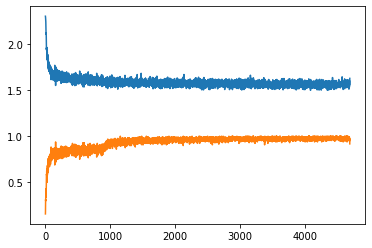

In [11]:
plt.plot(losses)

plt.plot(accs)